# $\textbf{Truncated sphere simulation results:}$

<img src="N_100.gif" align="right" width="450px"/>

We decided to run the simulation we set up from the "$\texttt{_ SETTINGS}$" notebook for $10 \cdot T_{coll} \sim 10 \  \mathrm{IU}$. 

This notebook primarily shows the obtained results through the simulation, and highlights the differences between the estimated and obtained collapse time as well as the radius evolution for each mass.

To determine the analytical quantities we used the following set of relations:

$a)$ To obtain the free-fall time (or collapse time):

$$-\sqrt{2GM_{0}} t_{free-fall} = \int_{r_0}^{\textbf{0}} \frac{dr}{r_0} \sqrt{\frac{r}{r_0}} \cdot \frac{1}{\sqrt{1-\frac{r}{r_0}}} \cdot r_o^{3/2} \rightarrow t_{free-fall} = \sqrt{\frac{3\pi}{32 G \rho_{0}}}$$

$b)$ To obtain the generic position in time $r(t)$ we instead invert:

$$-\sqrt{2GM_{0}} t_{i} = \int_{r_0}^{\textbf{r(t)}} \frac{dr}{r_0} \sqrt{\frac{r}{r_0}} \cdot \frac{1}{\sqrt{1-\frac{r}{r_0}}} \cdot r_o^{3/2}$$


### Fetching the data
This section serves to store and fetch the data post code-run.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.animation as animation

#config plot
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=14, usetex=False)
%config InlineBackend.figure_format='retina'

fname = 'output_trunc.txt'

/opt/anaconda3/lib/python3.9/site-packages/astroML/linear_model/linear_regression_errors.py:10: UserWarning: LinearRegressionwithErrors requires PyMC3 to be installed
  warnings.warn('LinearRegressionwithErrors requires PyMC3 to be installed')


In [2]:
data = pd.read_csv(fname).to_numpy()

In [3]:
N = 100
times = data[0::(N+2)].astype(float)

m = {}

for i in range(1, N + 1):
    
    m[f"{i}"]= data[i::(N+2)]  # take only the components every N+1 rows

In [4]:
# split the array (we don't like numbers strings to work with): 

m_data = {}

for j in range(1, N + 1):

    m_data[f"{j}"] = np.array([m[f"{j}"][i][0].split() for i in range(0, len(m[f"{j}"]))]).astype(float)

Data is then easily accessed from the dictionary in this way: 

$$m1 = \{"m1" : \mathrm{m1\_data\_1}[:, 0],\\"x1" : \mathrm{m1\_data\_1}[:, 1],\\"x2" : \mathrm{m1\_data\_1}[:, 2],\\"x3" : \mathrm{m1\_data\_1}[:, 3],\\"v1" : \mathrm{m1\_data\_1}[:, 4],\\"v2" : \mathrm{m1\_data\_1}[:, 5],\\"v3" : \mathrm{m1\_data\_1}[:, 6]\}$$

In [5]:
times_plot = np.hstack(times)

## Results

In this section I will analyze the 3-d plots of the trajectories, the radii evolution over time, and the estimate of the collapse time that we can extrapolate from the numerical simulation, comparing it with the "theoretical one" we saw in the "$\texttt{_ SETTINGS}$" notebook (which I will here report, by copying it (no pickle involved!!).

### 3-d plot of the trajectories

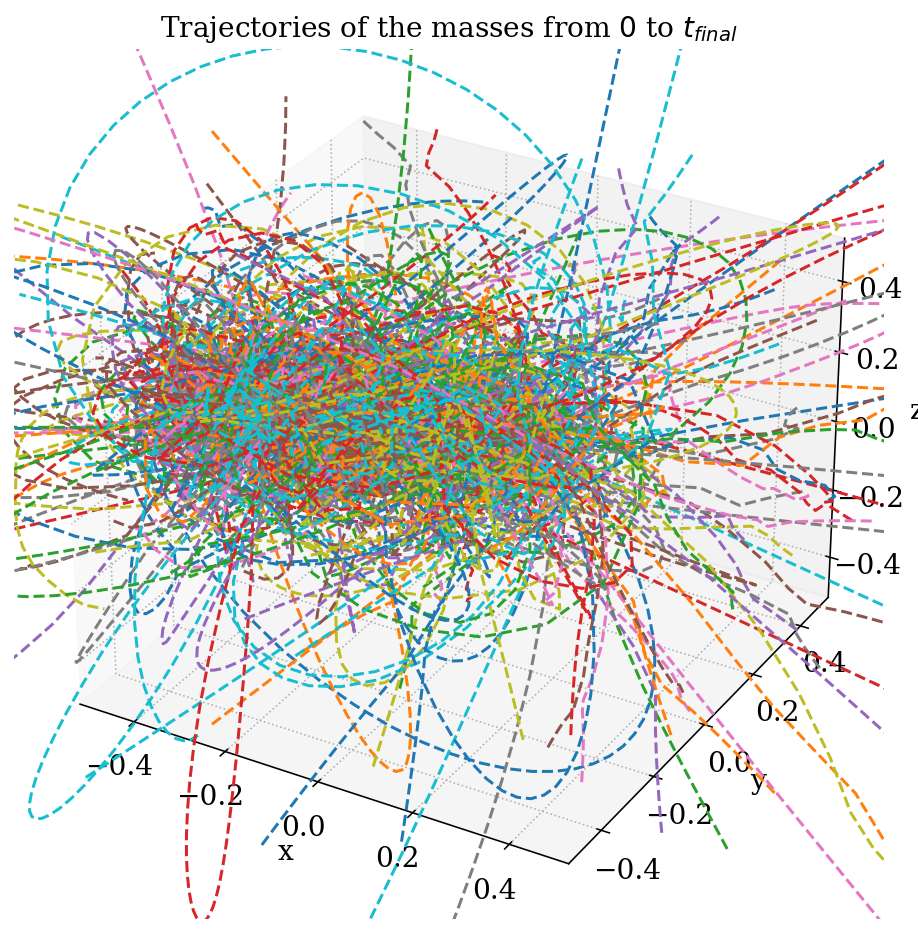

In [11]:
fig, ax = plt.subplots(subplot_kw=dict(projection='3d'), figsize=(8,8))

for i in range(1, N + 1):

    ax.plot(m_data[f"{i}"][:, 1], m_data[f"{i}"][:, 2], m_data[f"{i}"][:, 3], label=f"{i}th particle", linestyle='--')

    
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

ax.set_xlim(-0.5, 0.5)
ax.set_ylim(-0.5, 0.5)
ax.set_zlim(-0.5, 0.5)

plt.title(r'Trajectories of the masses from $0$ to $t_{final}$')
plt.show()

#plt.legend()

It is a bit messy, but we can understand that after an initial collapse some of the masses are scattered around in space, while others remain gravitationally bound.

### Radius $R(t)$ analysis

The goal is to see how the distances from the (0, 0, 0) point change over time. We then compare with the results of the dynamical and free-fall time. 

In [7]:
r_t = {}  # set an array where to store rays at different ts

for i in range(1, N + 1):  
    
    r_t[f"{i}"] = np.sqrt(m_data[f"{i}"][:, 1]**2 + m_data[f"{i}"][:, 2]**2 + m_data[f"{i}"][:, 3]**2)

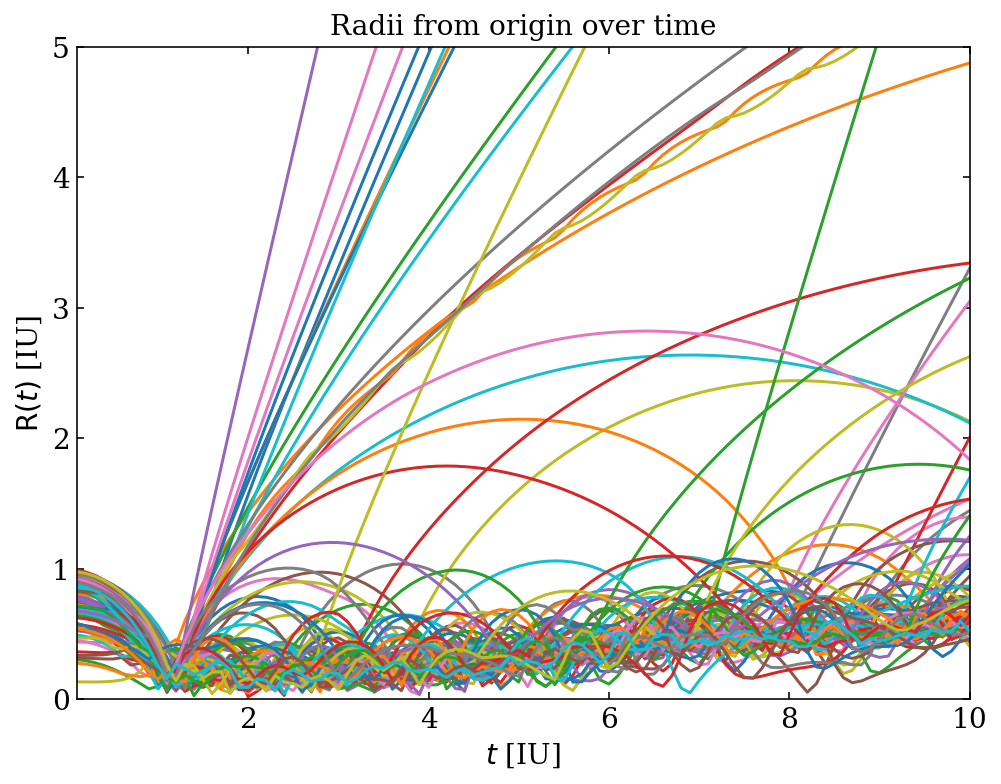

In [10]:
plt.figure(figsize = (8,6))

for i in range(1, N + 1):

    plt.plot(times_plot, r_t[f"{i}"][:], label = f"{i} mass")

plt.xlabel("$t$ [IU]")
plt.ylabel("$\mathrm{R}(t)$ [IU]")
plt.title("Radii from origin over time")
plt.ylim(0, 5)
plt.show()

## $R_{min}$ estimate

We want to see if the $T_{coll}$ we indicated in the previous notebook is relatable to what we observe in the simulation or not. To do so we decided to take the sum of the $r$ values, and then evaluate its minimum. The time $t_{min}$ we seek is a very rough estimation of the "$\textit{average}$" collapse time found for the masses (e.g. when the majority of masses reaches $R \sim 0$. 

In [12]:
def GetSumRs(): # function to evaluate the sum of all R at time t
    
    for i in range(0, len(times_plot)): 
    
        summation = 0
    
        for j in range(1, N):
        
            summation += r_t[f"{j}"][i]
    
        sum_Rs.append(summation)
        
    return np.array(sum_Rs)

In [13]:
sum_Rs = []
sum_Rs = GetSumRs()

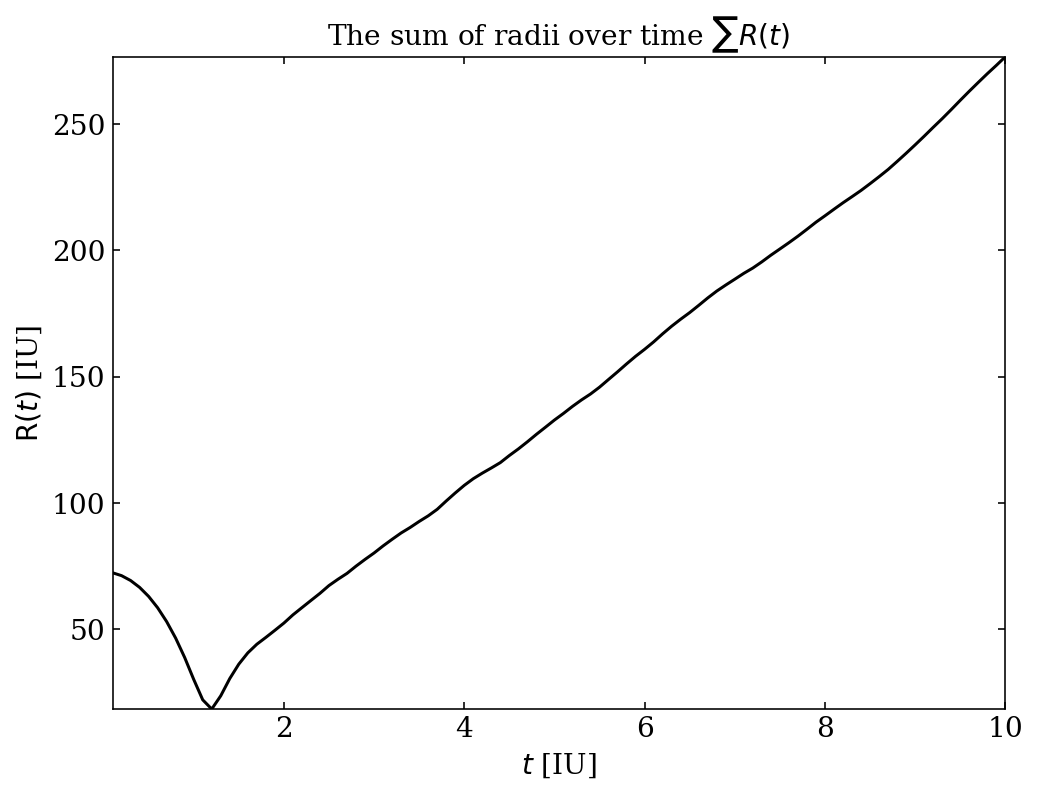

In [15]:
plt.figure(figsize = (8,6))

plt.plot(times_plot, sum_Rs, c='black')
plt.title("The sum of radii over time $\sum R(t)$")
plt.xlabel("$t$ [IU]")
plt.ylabel("$\mathrm{R}(t)$ [IU]")
#plt.legend()
plt.show()

Checking the minimum to find the estimate of $T_{coll}$:

In [16]:
print("sum_R_min: ", sum_Rs.min())
print("t_min: ", times_plot[sum_Rs.argmin()])

sum_R_min:  18.357865104726535
t_min:  1.200012093711433


Reporting the value extracted from the settings notebook:

In [17]:
T_coll = 1.1107207345395915
print("T_coll: ", T_coll)

T_coll:  1.1107207345395915


The $\textbf{relative}$ error is estimated as: 

In [18]:
err = np.abs(times_plot[sum_Rs.argmin()] - T_coll) / T_coll
print("rel_err: ", err)

rel_err:  0.08039046755425326


The final result can be summarized as:

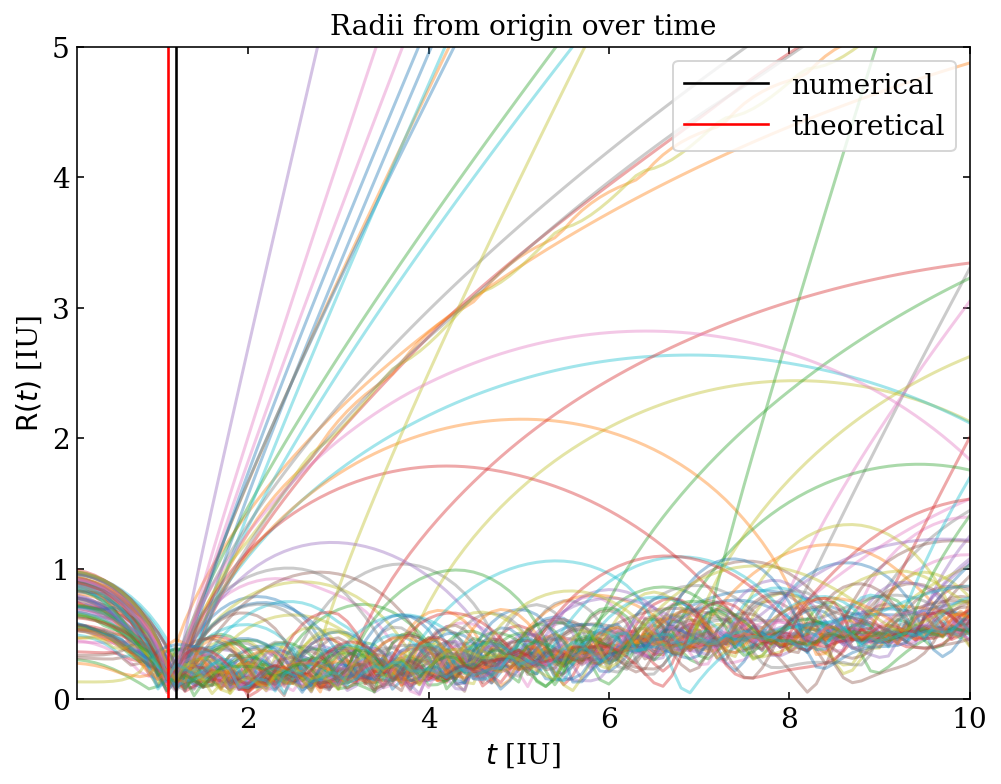

In [27]:
plt.figure(figsize = (8,6))

for i in range(1, N + 1):

    plt.plot(times_plot, r_t[f"{i}"][:], alpha=0.4)

plt.xlabel("$t$ [IU]")
plt.ylabel("$\mathrm{R}(t)$ [IU]")
plt.title("Radii from origin over time")
plt.axvline(x=times_plot[sum_Rs.argmin()], c='black', lw=1.3, label='numerical')
plt.axvline(x=T_coll, c='red', lw=1.3, label='theoretical')
plt.ylim(0, 5)
plt.legend(loc='upper right')
plt.show()

### Animation:

We produce the animation showcasing the behaviour of the simulated masses. 

In [25]:
def update(num):
    
    ax.clear() 
    
    for i in range(1, N): 
    
        ax.scatter(m_data[f"{i}"][num, 1], m_data[f"{i}"][num, 2], m_data[f"{i}"][num, 3], s=2.5)             
        
        #ax.scatter(m_data[f"{i}"][num, 1], m_data[f"{i}"][num, 2], m_data[f"{i}"][num, 3], marker='o', size=3.5, c='red')   
    
        ax.set_xlabel(r'$x$')
        ax.set_ylabel(r'$y$')
        ax.set_zlabel(r'$z$')
        
        ax.set_xlim(-0.5, 0.5)
        ax.set_ylim(-0.5, 0.5)
        ax.set_zlim(-0.5, 0.5)

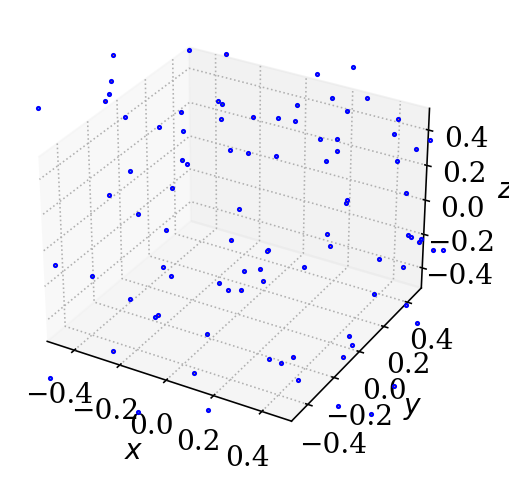

In [26]:
fig = plt.figure()
ax = plt.axes(projection='3d')
numDataPoints = int(len(m_data["100"][:, 2]))
line_ani = animation.FuncAnimation(fig, update, interval=15, frames=numDataPoints)

# Saving the Animation
f = r"N_100.gif"
writergif = animation.PillowWriter(fps=10)
line_ani.save(f, writer=writergif);

### Comments and observations

The simulation result provides a deep insight on the theory we explained at the beginning. We see that as times passes come of the masses are scattered around and others remain bound. This behaviour was expected because of the random generated points that were not placed at the exact opposites of the sphere, making it difficult to obtain a collapse in the same $R=0$ point. We can eventually check whether it is correct that the trajectories vary the way we see in the 3D plot. 